In [1]:
from tool_box import *
#importações
#manipulação de dados
import pandas as pd
from math import ceil

# bibliotecas para visualização
import matplotlib.pyplot as plt

- O conjunto de dados foi feito com base em questionário aplicado a 170 caisais.
- O questionario é inspirado no metodo Gottman de terapia de casais.
- Cada pergunta é avaliada em uma escala de 0 a 4, com 0 representando a avaliação mais baixa e 4 a avaliação mais alta.
- A última categoria indica se o casal é divorciado.

In [2]:
#carregamento do dataset
divorce_dataset = pd.read_csv('dataset/divorce.csv', sep=';')
divorce_dataset.head(5)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_46,question_47,question_48,question_49,question_50,question_51,question_52,question_53,question_54,class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


Dos 170 casais que foram ouvidos 49,4% (84) estavam divorciado e 50,6% (86) não divorciado (casado).

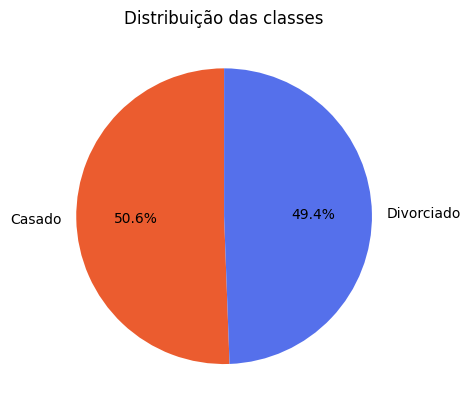

In [10]:
# gráfico de pizza com a distribuição das classes
labels = 'Casado','Divorciado'
sizes = [len(divorce_dataset[divorce_dataset['class'] == 0]), len(divorce_dataset[divorce_dataset['class'] == 1])]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#EB5C2F','#5570EB'])
plt.title('Distribuição das classes')
plt.show()

In [4]:
#nome dos atributos
attributes_name_list = divorce_dataset.columns.tolist()[0:-1]

#nome do atributo meta
meta_attribute = divorce_dataset.columns.tolist()[-1]

In [5]:
#entropia total do conjunto de dados
print(calculate_entropy(divorce_dataset, meta_attribute))

0.9999


In [6]:
#calcula o ganho de informação de cada atributo
gain_list = []

for attribute in attributes_name_list:
    gain_list.append(calculate_information_gain(divorce_dataset,meta_attribute,attribute))

gain_df = pd.DataFrame({'attribute': attributes_name_list, 'gain': gain_list})
gain_df.sort_values(by='gain', ascending=False, inplace=True, ignore_index=True)
gain_df['question'] = [question_dict[x]["question"] for x in gain_df['attribute']]
gain_df['gottman_principle'] = [question_dict[x]["gottman_principle"] for x in gain_df['attribute']]

gain_df[['attribute','question', 'gain']].to_csv('result/gain.csv', index=False, sep=';', decimal=',')

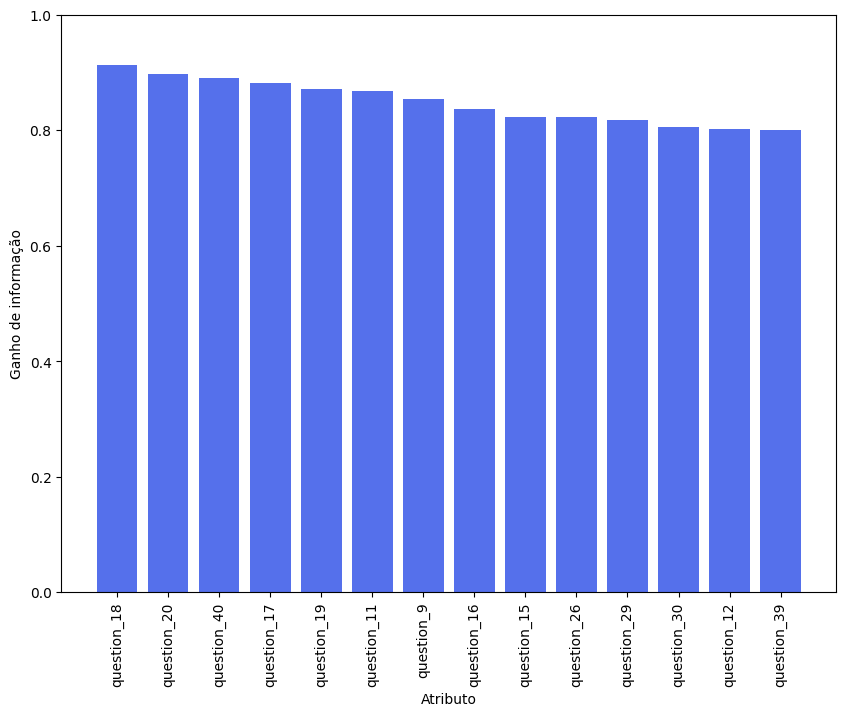

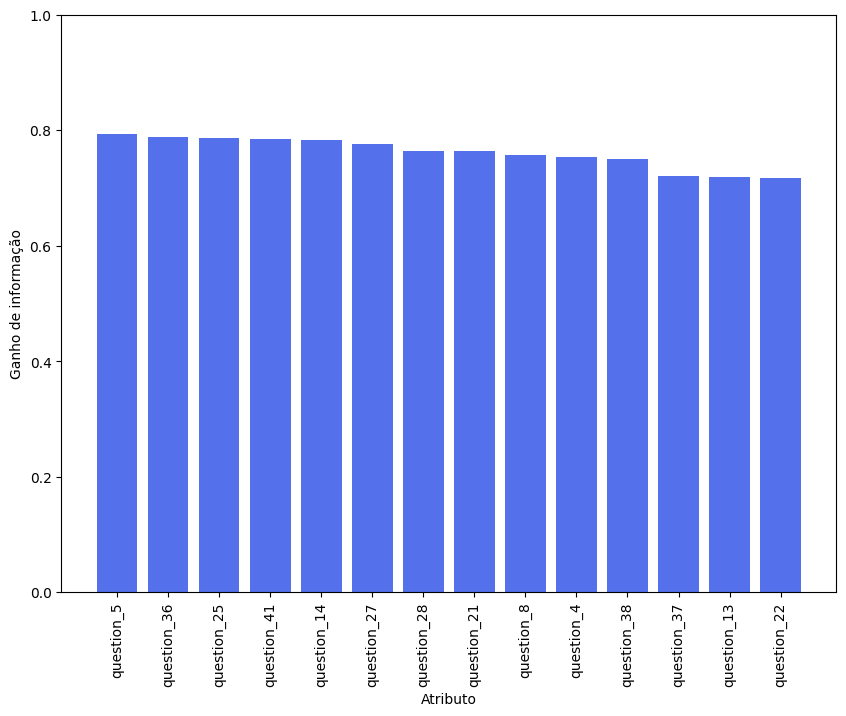

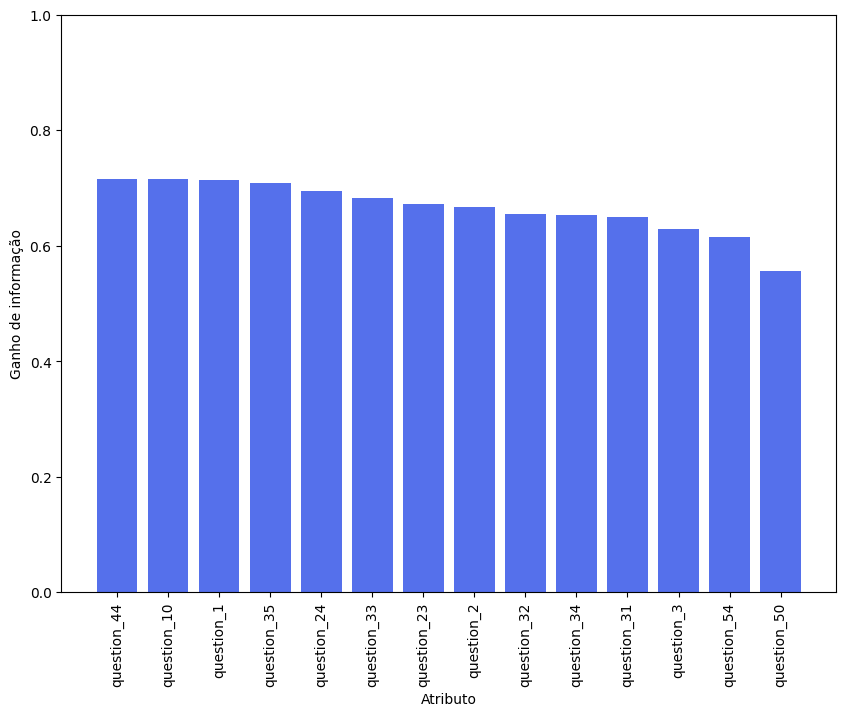

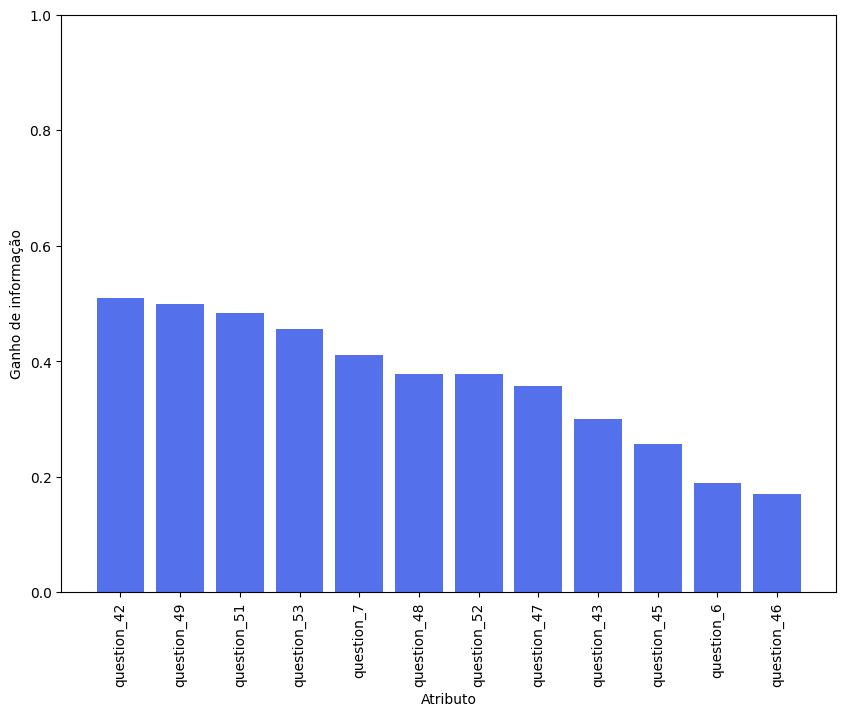

In [7]:
n = 4 #divide o gráfico em n partes

init = 0
step = ceil(len(gain_df) / n)

for i in range(n):
    start = i * step
    end = min(start + step, len(gain_df))
    
    plt.figure(figsize=(10, 7.5))
    plt.bar(gain_df['attribute'][start:end], gain_df['gain'][start:end], color='#5570EB')
    plt.xticks(rotation=90)
    plt.xlabel('Atributo')
    plt.ylabel('Ganho de informação')
    plt.ylim(0, 1)
    plt.show()


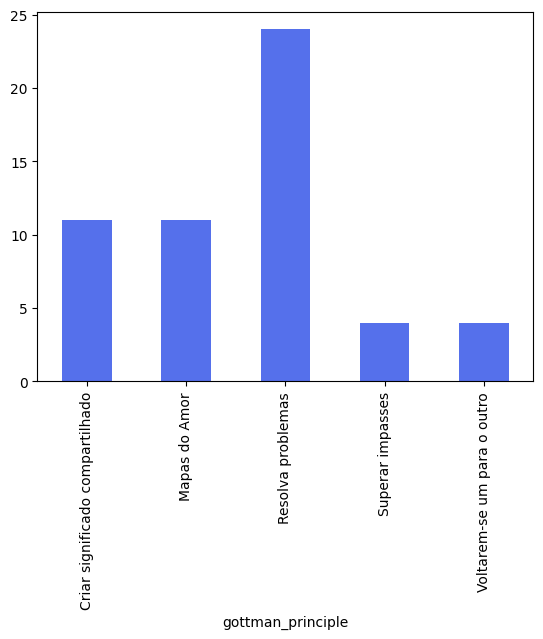

C:\Users\Rafael Professor\AppData\Local\Temp\ipykernel_19056\1756819620.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gain_df.groupby('gottman_principle').mean()['gain'].plot(kind='bar', color='#5570EB')


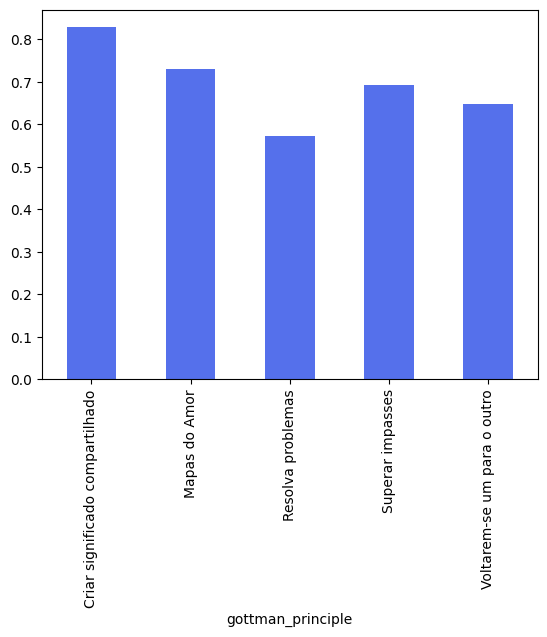

In [8]:
gain_df.groupby('gottman_principle').count()['attribute'].plot(kind='bar', color='#5570EB')
plt.show()

gain_df.groupby('gottman_principle').mean()['gain'].plot(kind='bar', color='#5570EB')
plt.show()